<a href="https://colab.research.google.com/github/hisyamhilmiomar/algoTradingStrat/blob/main/DCA_vs_LS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dollar Cost Average Investment Strategy vs Lump Sum Investment Strategy

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [4]:
ticker = 'SPY'

asset = yf.download(ticker, start = '2014-01-01')
asset

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,183.979996,184.070007,182.479996,182.919998,152.196243,119636900
2014-01-03,183.229996,183.600006,182.630005,182.889999,152.171265,81390600
2014-01-06,183.490005,183.559998,182.080002,182.360001,151.730331,108028200
2014-01-07,183.089996,183.789993,182.949997,183.479996,152.662155,86144200
2014-01-08,183.449997,183.830002,182.889999,183.520004,152.695480,96582300
...,...,...,...,...,...,...
2024-05-20,529.570007,531.559998,529.169983,530.059998,530.059998,37764200
2024-05-21,529.280029,531.520020,529.070007,531.359985,531.359985,33437000
2024-05-22,530.650024,531.380005,527.599976,529.830017,529.830017,48390000


Text(0, 0.5, 'Adjusted Close Price (USD)')

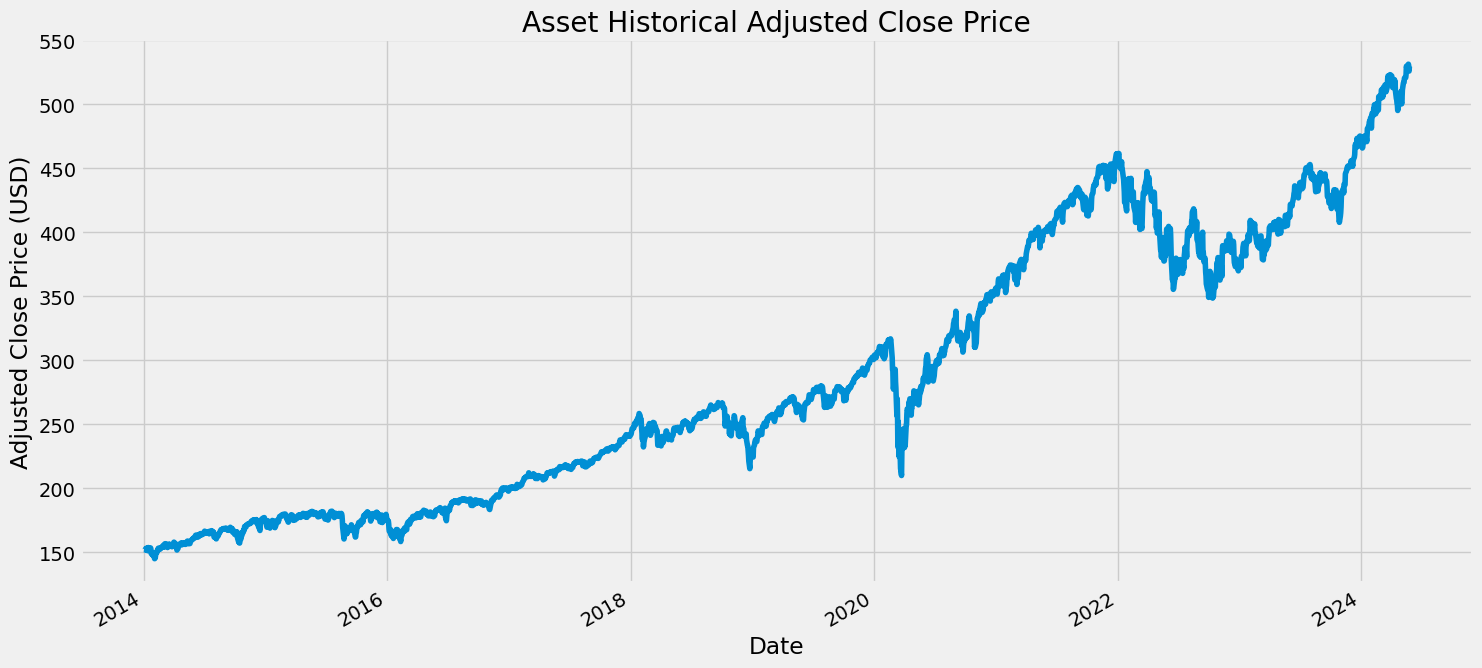

In [6]:
#Visually show the adj close price historical data

asset['Adj Close'].plot(figsize = (16,8))
plt.title('Asset Historical Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')

In [7]:
#Calculate and show lump sum investment strategy
#Get the adjusted close prices from dataset

adj_close_prices = asset['Adj Close']

#Choose the initial investment amount

initial_investment = 5000

#Get latest or last price value of the stock/ETF within this dataset

stock_latest_value = adj_close_prices[-1]

#Get number of shares bought on each date with the hypothetical investment amount (AKA lumpsum)

num_shares_bought = initial_investment / adj_close_prices

#Calculate how much money I/you would have according to the last price in this dataset for investing a
#lump sum on a given date in the past

lump_sum = stock_latest_value * num_shares_bought

lump_sum

Date
2014-01-02    17393.333469
2014-01-03    17396.188553
2014-01-06    17446.742437
2014-01-07    17340.250500
2014-01-08    17336.466058
                  ...     
2024-05-20     4994.151652
2024-05-21     4981.933313
2024-05-22     4996.319436
2024-05-23     5033.082177
2024-05-24     5000.000000
Name: Adj Close, Length: 2617, dtype: float64

In [16]:
#Compute and show the best and worst day for a lump sum investment

print('Lump Sum Investments : ')
print('The best day to invest a $' + str(initial_investment) + ' lump sum was on ' + lump_sum.idxmax().strftime('%b %d %Y') + ' and would be worth $' + str(round(lump_sum.max(),2)) + ' on ' + lump_sum.last_valid_index().strftime('%b %d %Y'))
print('The worst day to invest a $' + str(initial_investment) + ' lump sum was on ' + lump_sum.idxmin().strftime('%b %d %Y') + ' and would be worth $' + str(round(lump_sum.min(),2)) + ' on ' + lump_sum.last_valid_index().strftime('%b %d %Y'))

Lump Sum Investments : 
The best day to invest a $5000 lump sum was on Feb 03 2014 and would be worth $18267.14 on May 24 2024
The worst day to invest a $5000 lump sum was on May 21 2024 and would be worth $4981.93 on May 24 2024


Text(0, 0.5, 'Investment Value (USD)')

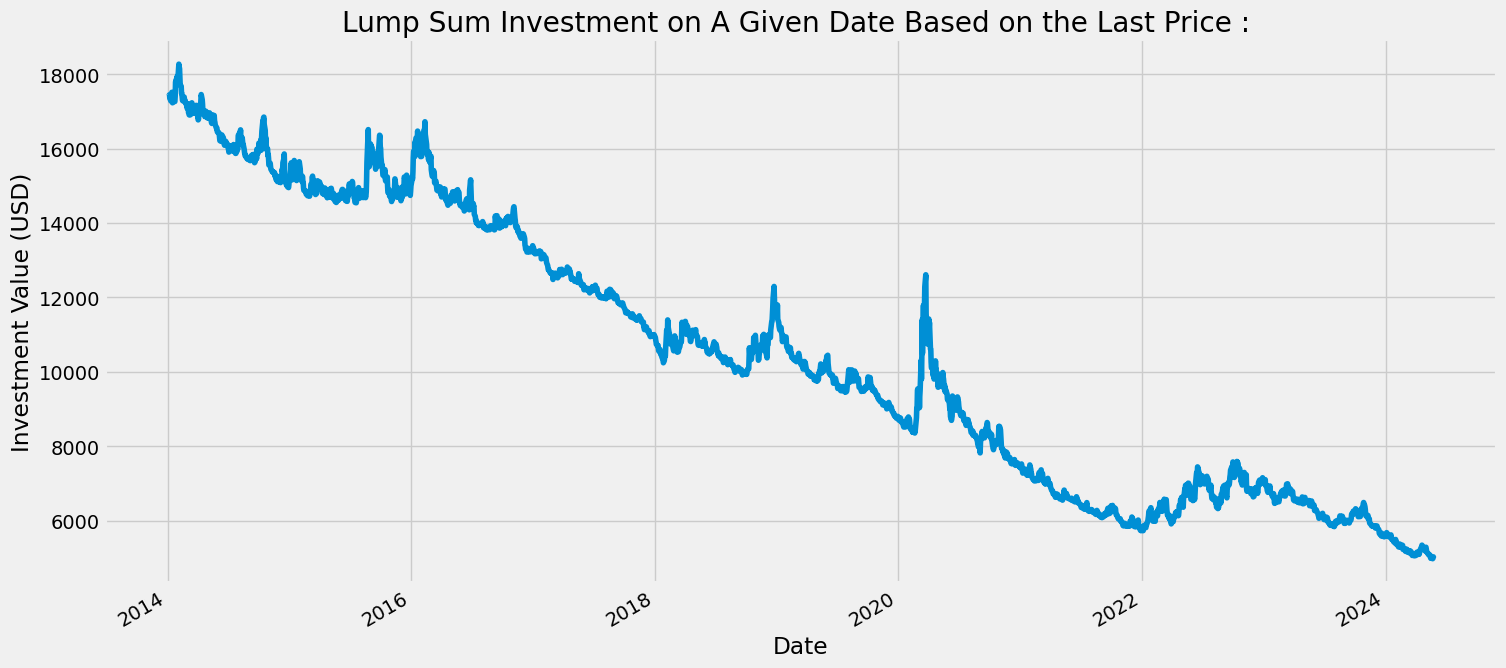

In [17]:
#Plot the lump sum data

lump_sum.plot(figsize = (16,8))
plt.title('Lump Sum Investment on A Given Date Based on the Last Price : ')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')

In [27]:
from functools import total_ordering
#Create a function to calculate the Dollar Cost Averaging Strategy

def DCA(start_date, initial_investment):
  #Get the investment periods which will be 12
  investment_date_periods = 12.0

  #Calculate portion or amount that we plan to invest for each investment date period
  investment_portion = initial_investment/investment_date_periods

  #Get date of investment periods
  all_investment_dates = pd.date_range(start_date, periods = investment_date_periods, freq = '30D')

  #Get the dates up to the last date in our dataset
  investment_dates = all_investment_dates [all_investment_dates < asset.index[-1]]

  #Get the indices(and in turn the dates) within the data set that are the closest to
  #the investment dates

  closest_investment_dates = asset.index.searchsorted(investment_dates)

  #Get list of stock prices at the closest investment date
  stock_prices = asset['Adj Close'][closest_investment_dates]

  #Get total number of shares that we invested in by adding all of the shares purchased on each of the
  #investment dates

  total_shares_invested = sum(investment_portion/stock_prices)

  #Get the cash that was not invested from the initial investment amount
  uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])

  #Calculate total
  total = uninvested_cash + asset['Adj Close'][-1] * total_shares_invested

  return total



In [28]:
#Execute the DCA function

DCA_List = []
for date in asset.index:
  DCA_List.append(DCA(date, initial_investment))


In [29]:
#Convert the list to a series

#create new dataframe

dca = pd.DataFrame()
dca['DCA'] = DCA_List

#Set the date as the index

dca = dca.set_index(pd.DatetimeIndex(asset.index))

#Convert the dataframe to a series

dca = dca.squeeze()

#Show the data

dca

Date
2014-01-02    16483.653852
2014-01-03    16469.930476
2014-01-06    16463.035676
2014-01-07    16432.338625
2014-01-08    16407.573412
                  ...     
2024-05-20     4999.512638
2024-05-21     4998.494443
2024-05-22     4999.693286
2024-05-23     5002.756848
2024-05-24     5000.000000
Name: DCA, Length: 2617, dtype: float64

In [30]:
#Compute and show the best and worst day for a DCA investment


print('Dollar Cost Average Investments : ')
print('The best day to start a DCA investment of $' + str(initial_investment) + ' was on ' + dca.idxmax().strftime('%b %d %Y') + ' and would be worth $' + str(round(dca.max(),2)) + ' on ' + lump_sum.last_valid_index().strftime('%b %d %Y'))
print('The worst day to start a DCA investment of $' + str(initial_investment) + ' was on ' + dca.idxmin().strftime('%b %d %Y') + ' and would be worth $' + str(round(dca.min(),2)) + ' on ' + lump_sum.last_valid_index().strftime('%b %d %Y'))

Dollar Cost Average Investments : 
The best day to start a DCA investment of $5000 was on Jan 02 2014 and would be worth $16483.65 on May 24 2024
The worst day to start a DCA investment of $5000 was on May 21 2024 and would be worth $4998.49 on May 24 2024


Text(0, 0.5, 'Investment Value (USD)')

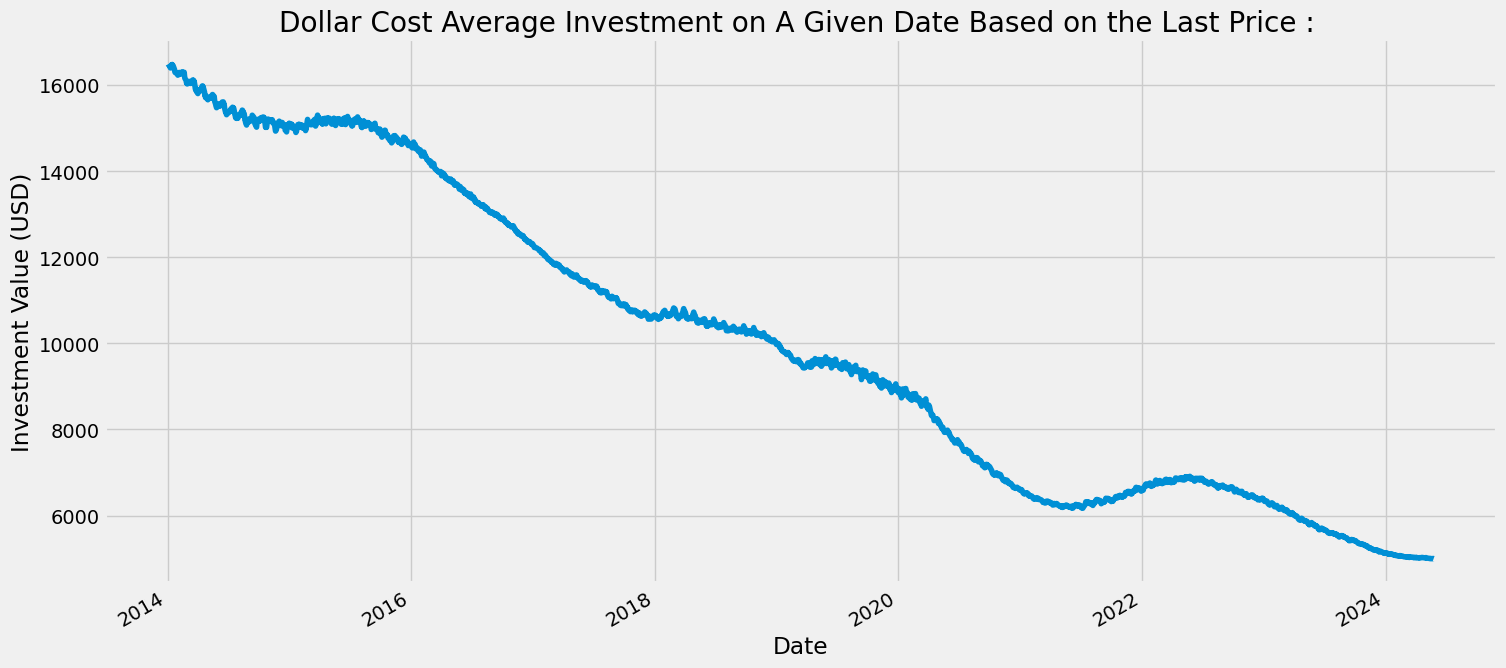

In [31]:
#Plot the DCA data

dca.plot(figsize = (16,8))
plt.title('Dollar Cost Average Investment on A Given Date Based on the Last Price : ')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')

In [33]:
#Get the volatility

lump_sum_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()

print('Lump sum Volatility : ', lump_sum_vol)
print('DCA Volatility : ', dca_vol)

Lump sum Volatility :  0.01100092059134244
DCA Volatility :  0.0032559661919887538


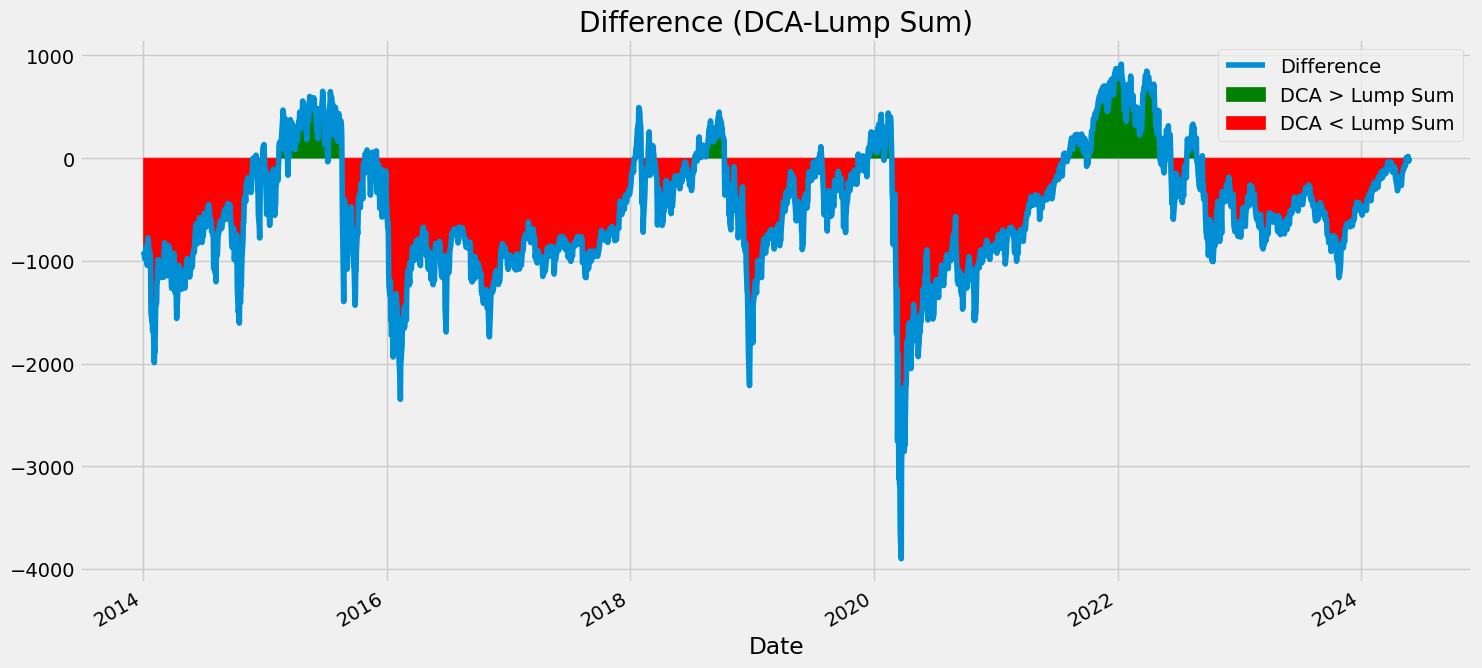

In [35]:
#Get the difference

difference = dca - lump_sum

#Plot the difference
difference.plot(figsize=(16,8), label = 'Difference')
plt.fill_between(difference.index, y1 = difference, y2 =0, color ='green', where = difference >0, label = 'DCA > Lump Sum')
plt.fill_between(difference.index, y1 = difference, y2 =0, color ='red', where = difference < 0, label = 'DCA < Lump Sum')

plt.title('Difference (DCA-Lump Sum)')
plt.legend()

In [40]:
#Calculate the win percentages
lump_sum_win_percentage = round(sum(difference<0)/ len(difference) * 100,1)
DCA_win_percentage = round(sum(difference>0)/ len(difference) * 100,1)

print('Dollar Cost Averaging returned more than Lump Sum ' +str(DCA_win_percentage) + ' % of the time')
print('Lump Sum returned more than Dollar Cost Averaging ' +str(lump_sum_win_percentage) + ' % of the time')

Dollar Cost Averaging returned more than Lump Sum 19.6 % of the time
Lump Sum returned more than Dollar Cost Averaging 80.4 % of the time
